In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from data import DataProvider
import typing as T
import numpy as np

In [2]:
provider = DataProvider()
raw_df = provider.read_excel()
scaled_df = provider.scale_data(raw_df)

In [3]:
charging_df_0_2 = provider.get_charging_data(scaled_df, 0, -2)
charging_df_2_8 = provider.get_charging_data(scaled_df, -2, -8)
charging_df_8_14 = provider.get_charging_data(scaled_df, -8, -14)

charging_dfs = [charging_df_0_2, charging_df_2_8, charging_df_8_14]
rangesStrings = ["0A - 2A", "2A - 8A", "8A - 14A"]

In [4]:
from XGBoostBenchmaker import XGBoostBenchmarker
from utils import predict_and_plot

ensemble_benchmarker = XGBoostBenchmarker()
results = ensemble_benchmarker.run_benchmark(charging_dfs, rangesStrings)


🚀 Processing Range 1 (0A - 2A) with XGBoost...
  ✅ XGBoost Done. MAE: 0.3464 V | R²: 0.6963

🚀 Processing Range 2 (2A - 8A) with XGBoost...
  ✅ XGBoost Done. MAE: 0.1704 V | R²: 0.7950

🚀 Processing Range 3 (8A - 14A) with XGBoost...
  ✅ XGBoost Done. MAE: 0.1762 V | R²: 0.7507



--- Visualizing Best Model: 0A - 2A ---
  -> MAE of Model: 0.3464
  -> MSE of Model: 0.245277
  -> R2 of Model: 0.696267

--- Metrics vs. Smoothed Baseline for '0A - 2A' ---
  Smoothed MAE: 0.1221 V
  Smoothed MSE: 0.0297
  Smoothed R²:  0.8527
-------------------------------------------------


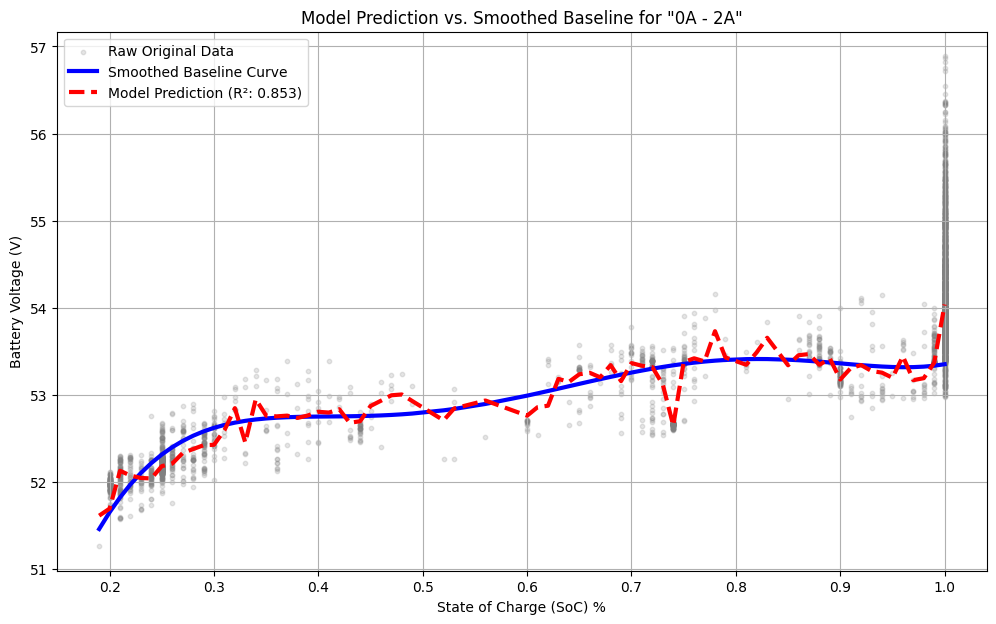


--- Visualizing Best Model: 2A - 8A ---
  -> MAE of Model: 0.1704
  -> MSE of Model: 0.072701
  -> R2 of Model: 0.795022

--- Metrics vs. Smoothed Baseline for '2A - 8A' ---
  Smoothed MAE: 0.1049 V
  Smoothed MSE: 0.0211
  Smoothed R²:  0.8859
-------------------------------------------------


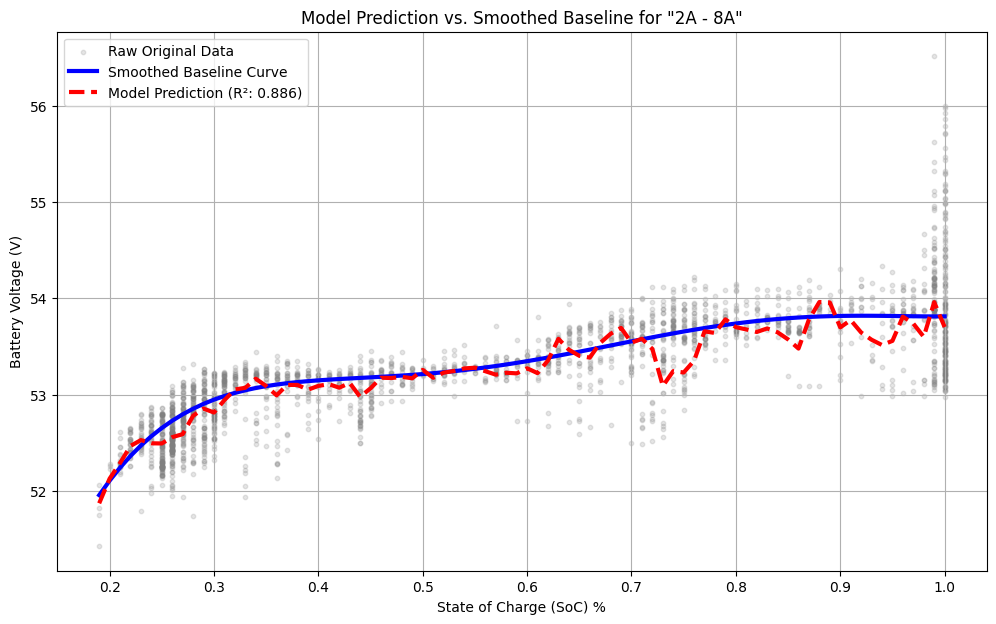


--- Visualizing Best Model: 8A - 14A ---
  -> MAE of Model: 0.1762
  -> MSE of Model: 0.085743
  -> R2 of Model: 0.750679

--- Metrics vs. Smoothed Baseline for '8A - 14A' ---
  Smoothed MAE: 0.0664 V
  Smoothed MSE: 0.0089
  Smoothed R²:  0.9439
-------------------------------------------------


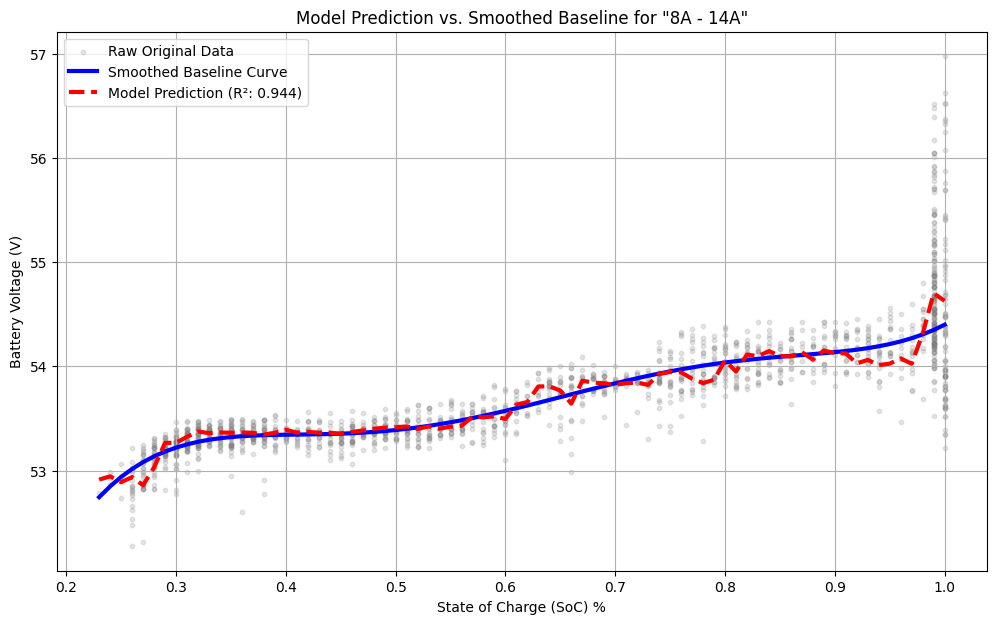

In [5]:
# --- Select the best result to visualize ---
for key, result in results.items():
    y_true = result['y_true'].flatten()
    y_pred = result['y_pred'].flatten()
    df_original = result["df_original"]

    print(f"\n--- Visualizing Best Model: {key} ---")
    print(f"  -> MAE of Model: {result["mae"]:.4f}")
    print(f"  -> MSE of Model: {result["mse"]:.6f}")
    print(f"  -> R2 of Model: {result["r2"]:.6f}")

    predict_and_plot(key, results, provider)